<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Andrea Flores Fernández y Tania Bell Nicholls.

**Fecha:** 09 de octubre del 2021.

**Expediente** : IF725449 y IF716767.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Tania-Bell/Proyecto_TBell_AFlores.git

# Proyecto Simulación - Radiación Solar

## Descripción

> Nuestro dataset contiene las mediciones de 4 meses con diferentes variables que nos ayudan a predecir el nivel de radiación solar. Predecir la radiación solar es importante ya que es la fuente de energía mas importante de la tierra y tiene efectos balance de radiación en la superficie, ciclos hidrológicos, fotosíntesis, condiciones meteorológicas y climas extremos.  



## Objetivos

> #### Objetivo General:
El objetivo es obtener las condiciones climáticas que generan una alta radiación solar basado en el análisis de la temperatura, presión, humedad y velocidad del viento, realizando una simulación de los patrones de las cuatro variables.

> #### Objetivo específico:
    > - Encontrar la correlación entre los datos.
    > - Simular escenarios en donde la radiación solar esté alta, basada en la condición climática y atmosférica, como la temperatura, la presión, la humedad y la velocidad del viento.
    > - 
    > - 

## Definición del Problema

>La radiación solar es importante porque provee calor, luz y energía. Estos tres elementos son vitales para los seres vivos. La radiación infraroja provee calor a todos los diferentes habitats en el mundo y sin esa radiación que proviene del sol, la superficie estaría 32 grados centígrados más frío. La luz que también proviene de la radiación solar, es vital para que los seres humanos y otros seres vivos ya que su visión no está adaptada para la oscuridad. Inclusivamente, las plantas requieren de la luz del sol para tener energía.
Todo esto nos muestra lo importante que es la radiación solar, pero a causa del calentamiento global, la radiación solar es cada vez más intensa y cada día hay más radiación de lo que necesitamos para vivir, al punto en donde ya empieza a dañarnos.
Las personas son afectadas por la radiación ultravioleta que es parte de la radiación solar. La radiación ultravioleta daña la piel de las personas, incrementando la posibilidad de cáncer de piel. La radiación ioninizante que también está incluida en la radiación solar es la que produce cambios químicos en las células y daña el ADN. Esto puede afectar negativamente a todos los tipos de seres vivos.
Esta información nos lleva a querer prevenir y poder detectar cuándo hay altos niveles de radiación solar. Los meteorólogos han encontrado una conexión entre las condiciones meteorológicas y el nivel de radiación solar. Queremos encontrar esta conexión para simular estos eventos y poder determinar el nivel de radiación y por ende poder dar recomendaciones al encontrarse en esas condiciones. Podemos dar recomendaciones a las personas cuando están las condiciones que generan un alto nivel de radación y decirles que se protejan de la radiación, aún más, cuando se encuentran en dichas condiciones. De esta manera podemos intentar prevenir los efectos negativos de la radiación solar.

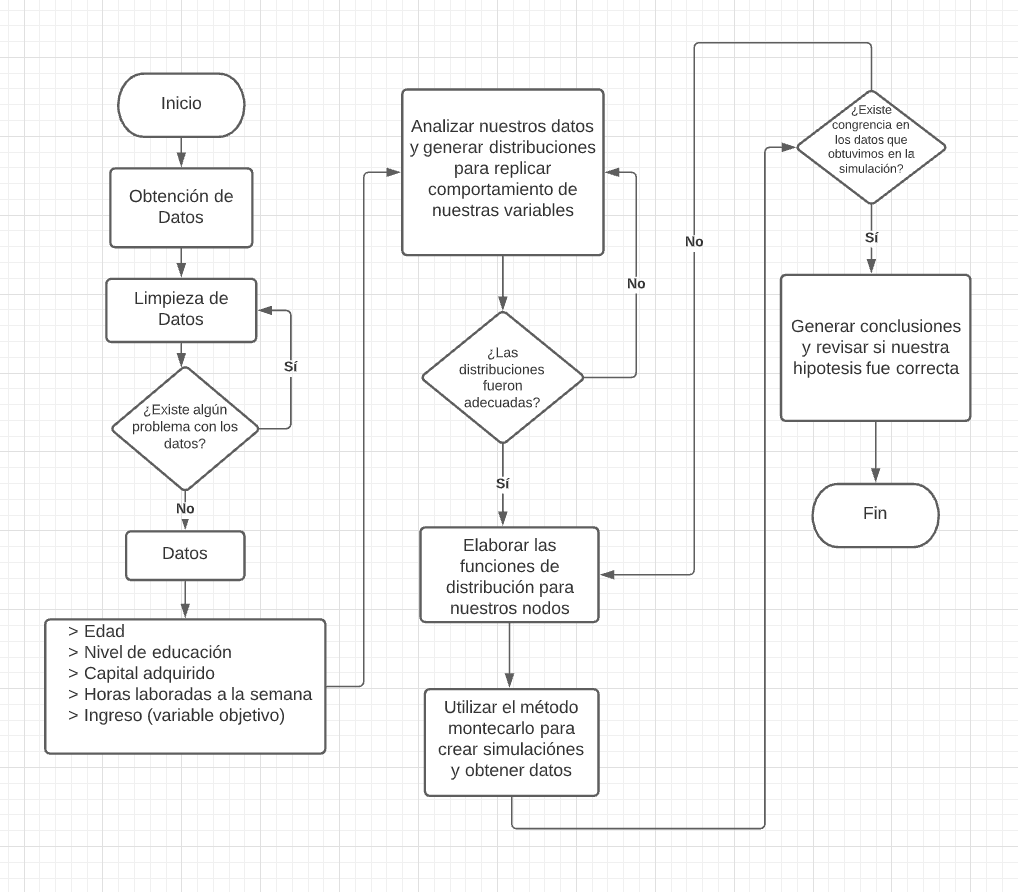

## Nodos y variables que se decidieron simular y por qué

>Para desarrollar el proyecto tomamos las siguientes variables de datos meteorológicos:
    > - Temperatura: dada en grados Fahrenheit, mide el grado de caliente o frío relativo.
    > - Presión atmosférica/barométrica: dada enpulgada de mercurio (Hg), mide la fuerza por unidad de superficie que ejerce el aire que forma la atmósfera sobre la superficie terrestre.
    > - Humedad: dada en porcentaje, mide el vapor de agua contenido en la atmósfera.
    > - Velocidad del viento: dada en millas por hora, mide la componente horizontal del desplazamiento del aire.

>Nuestra variable objetivo es la radiación solar. Esta se mide en watts por metro cuadrado y es la radiación electromagnética procedente del Sol. Seleccionamos nuestros nodos ya que es conocido que las condiciones meterológicas afectan el nivel de radiación solar que recibe la superficie de la tierra. Al obtener datos meteorológicos, esto nos permite identificar en qué condiciones se da la radiación alta y por ende poder simular los escenarios para predecir el nivel de radiación.

## Definición de hipótesis y supuestos



- Los datos fueron medidos correctamente y con la misma precisión.
- Con los datos proporcionados, es posible analizarlos para encontrar su correlación y sus distribuciones
- Los cuatro nodos son suficientes para predecir el nivel de radiación solar


- Podremos definir el nivel de radiación solar
- 
-
-

## Librerías y Funciones

In [18]:
# importación de las librerías
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sm 
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from sklearn.model_selection import GridSearchCV
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import warnings
warnings.filterwarnings("ignore")

In [87]:
def histograma(dataset:'Dataset',
               datos:'Nodo',
               title:'Titulo de grafica',
               bin:'Numero de bins'):
    '''
    Funcion que genera el histograma de datos proporcionados y numero de bins dados
    '''
    plt.figure(figsize=(7,4))
    plt.hist(dataset[datos], bins = bin, density=True);
    plt.title(title);

def boxplot(data:'Nodo',
           title:'Titulo de grafica'):
    '''
    Funcion que genera el boxplot de datos proporcionados
    '''
    plt.boxplot(data,vert=False)
    plt.title(title)
    plt.show()

def kde_statsmodels_m(x, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          #bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)


def distribuciones(data:'Nodo'):
    '''
    Iteración con las diferentes distribuciones. Retorna el plot con las distribuciones y tabla de error
    '''
    #generación de iteración de distribuciones en st, sólo las continuas
    rv_continuas = [d_i for d_i in dir(st) if isinstance(getattr(st, d_i), getattr(st, 'rv_continuous'))]

    #fig, ax = plt.subplots(1, 1, figsize=(10,7))
    #crea la tabla de errores por ditribución iterada
    error = pd.DataFrame(columns=['Distribución', 'Error'])
    i = 0
    y, x, _ = plt.hist(data, bins=50, density=True)
    x = x[1:]
    #se ejecuta la iteración
    for d_i in rv_continuas[20:30] + ['beta']:
        try:
            params = getattr(st, d_i).fit(data)
            data_hat = getattr(st, d_i).pdf(x, *params) # usando probability distribution function
            #ax.plot(x, data_hat, label=d_i)
            error.loc[i, :] = [d_i, np.mean((y - data_hat)**2)]
            i += 1
        except ValueError:
            pass

    #plt.legend()
    error.set_index('Distribución', inplace=True)
    error.sort_values('Error', inplace=True)
    return error

def pruebaq_q(data:'Nodo', 
              dist:'Distribución óptima'):
    '''
    Prueba Q_Q, genera gráfica con la distribución y la gráfica Q_Q (45 grados)
    '''
    # Histograma de las variables creadas
    fig, ax = plt.subplots(2,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)
    # distribuciones y prueba
    y, x, _ = ax[0].hist(data, 50, density=True, label='Histograma')
    params = getattr(st, dist).fit(data)
    y_hat = getattr(st, dist).pdf(x, *params) # usando probability distribution function
    # creación de gráficas
    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probabilidad')
    ax[0].grid()
    grafica = st.probplot(data, dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
    ax[1].grid()
    ax[1].set_title(dist)
    plt.show()
    
def red_var(data:'Nodo', N:'Número para muestra',f:'Pdf', t:'Función lambda', model:'Model'):
    '''
    Reducción de Varianza, retorna las variables aceptadas
    '''
    # parámetros y generación de variables
    r1 = muestra_est(N) # usando función del muestreo estratificado
    np.random.shuffle(r1)
    ct = 0
    i = 0
    var_acept = np.zeros(1000)
    # iteración de aceptación o rechazo
    while ct < 1000:    
        r = np.random.uniform(min(data), max(data), 1)
        f_x = f(r, model)
        t_x = t(r)
        condition = r1[i] * t_x <= f_x
        if condition[0]:
            var_acept[ct] = r[0]
            ct += 1
        i+=1
    return var_acept

def pdf(x:'x_grid, intervalo', model:'Model'):
    '''
    Pdf para reducción de varianza
    '''
    return np.exp(model.score_samples(x.reshape(-1, 1)))

def muestra_est(n:'Número de muestras'):
    '''
    Muestreo Estratificado
    '''
    # generación de variables aleatorias entre 0 y 1
    u = np.random.uniform(0, 1, n)
    i = np.arange(0, n)
    return (u + i) / n

def kolmogorov(data:'Nodo',dist:'Distribución Óptima'):
    '''
    Prueba Kolmogorov-Smirnov
    '''
    param = getattr(st, dist).fit(data)
    return st.kstest(data, dist, args = (param))

def chi_cuadrada(dist:'Distribución Óptima', data:'Nodo', x:'x', y:'y', J1:'Bins', c:'Confianza'):
    '''
    Prueba de Chi cuadrada, genera el teórico, el de la librería, el estadístico y arroja media y desviación estándar
    '''
    # parámetros
    param = getattr(st, dist).fit(data)
    pi = getattr(st, dist).pdf(x, *param) # usando probability distribution function
    
    Ei = x*pi

    x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y))) # teórico
    print('Chi cuadrado teórico: ', x2)

    X2 = st.chisquare(y, Ei) # usando librería scipy.stats
    print('Chi cuadrado stats: ', X2)

    p = len(param) 
    m = J1-p-1 
    
    Chi_est = st.chi2.ppf(q=c, df=m) # estadístico
    print('Estadístico de chi_cuadrado: ', Chi_est)
    
    mu = np.mean(x) # media
    sigma = np.std(x) # desviación estándar
    print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)
    

    #Prueba de intervalos de confianza
def intervalo_confianza(X:'Nodo',
                        confianza:'Intervalo de confianza'):
    '''
    Función que realiza la prueba de intervalo de confianza por medio de aceptar o rechazar una hipótesis nula
    '''
    N = len(X)
    i1 = st.t.interval(confianza, len(X)-1, loc=np.mean(X), scale=st.sem(X))
    i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
    media = np.mean(X)
    h_0 = st.ttest_1samp(X, media) # prueba de hipotesis nula para media de montecarlo = media de datos originales
    est = (np.mean(X) - media)/(np.std(X) / np.sqrt(N)) # estadístico normalizado
    cuantil = st.t(N-1).cdf(confianza/2) # rechazo
    print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
    print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
    print('Media calculada' ,np.mean(X))
    if h_0.pvalue > confianza:
        print("La media es",media,"con un",confianza,"% de confianza, por lo tanto se acepta la hipótesis nula.")
    else:
        print("La media es diferente de",media,"por lo tanto se rechaza la hipótesis nula.")

## Obtención de bases de datos

> Nuestro dataset fue proporcionado por la NASA y lo obtuvimos de una publicación en Kaggle 

> https://www.kaggle.com/dronio/SolarEnergy/version/1

In [20]:
# importación de los datos, el archivo está en un csv y se llama adult
data = pd.read_csv('SolarPrediction.csv')
#data = data[['age','educational-num','capital-gain','hours-per-week']].head(20001)
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


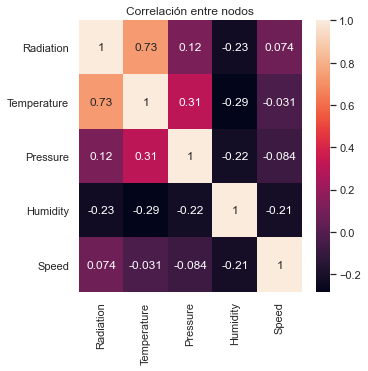

In [17]:
# análisis de correlación entre los datos
corrMatrix = data.drop(['UNIXTime','WindDirection(Degrees)'],axis=1).corr()
sn.heatmap(corrMatrix, annot=True, linewidths=.0001)
sn.set(rc = {'figure.figsize':(5,5)})
plt.title('Correlación entre nodos') # generación de tabla
plt.show()

#### Interpretación: 
La correlación entre la velocidad del viento y la radiación es muy pequeña. Hay una correlación pequeña pero negativa entre la radiación y la humedad. Esto siginifica que cuando la humedad aumenta, la radiación disminuye, y vice versa. Hay una correlación un poco más fuerte entre la presión atmosférica y la radiación. Pero la correlación más significativa es la de la temperatura y la radiación solar. Esto nos indica que podremos predecir la radiación basándonos en la temperatura, por la mayor parte.

## Visualización de Variables

Para generar una idea general de nuestros datos, los visualizaremos usando histogramas. Nos mostrará, a primera vista, si hay una distribución obvia en nuestros nodos.

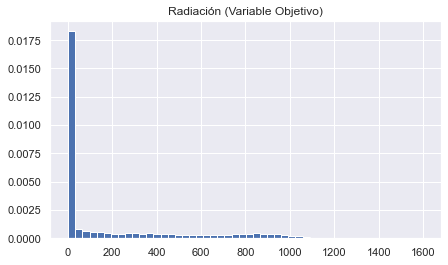

In [9]:
# histograma para visualizar objetivo: la Radiación 
histograma(data,'Radiation','Radiación (Variable Objetivo)',50)

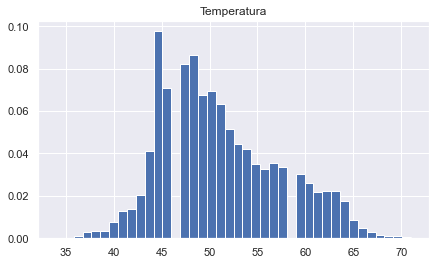

In [10]:
# histograma para visualizar la variable temperatura
histograma(data,'Temperature','Temperatura',40)

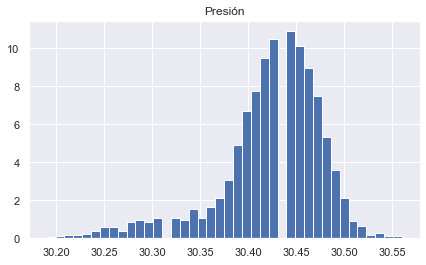

In [11]:
# histograma con 40 bins para visualizar la variable presión 
histograma(data,'Pressure','Presión',40)

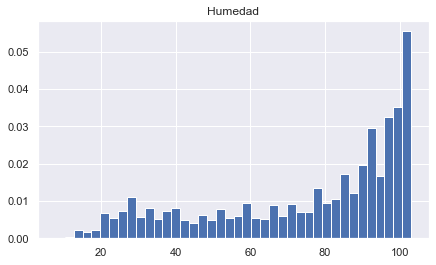

In [12]:
# histograma para visualizar la variable humedad 
histograma(data,'Humidity','Humedad',40)

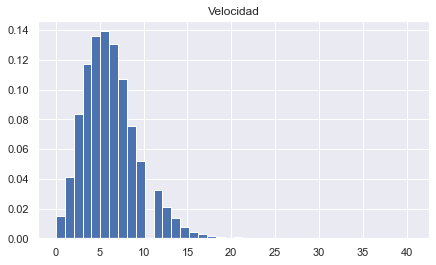

In [13]:
# histograma para visualizar la variable velocidad
histograma(data,'Speed','Velocidad',40)

## Procedimiento de la simulación:

>Primero, generaremos box-plots para visualizar los outliers y poderlos eliminar para tener datos más uniformes. Luego, implementaremos algunos métodos como logaritmo o raíz cuadrada para ajustar los datos. Como tercer paso, encontraremos el bandwidth adecuado para cada nodo y posteriormente realizaremos el método de KDE usando la librería Scikit-learn. Después realizaremos el método de reducción de varianza usando aceptación y rechazo. Luego simularemos con varias distribuciones para ver cuál es la más adecuada para cada nodo. Usando la distribución con menor error, realizaremos la prueba Q_Q, kolmogorov y chi cuadrada. 

## Nodo 1: Temperatura 

#### Box-Plots y Ajuste de datos

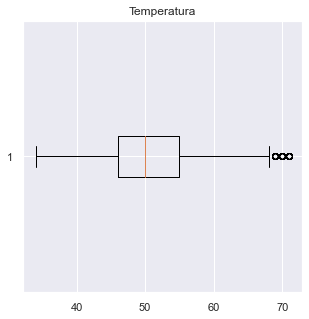

In [21]:
temp = np.array(data['Temperature'])
boxplot(temp,'Temperatura') #mostramos boxplot e identificamos outliers 

#### KDE

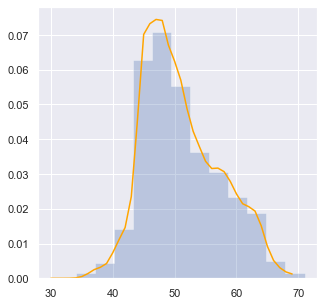

In [22]:
x_grid = np.arange(30,70)
kde = kde_statsmodels_m(temp)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(temp, bins=12, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Reducción de Varianza

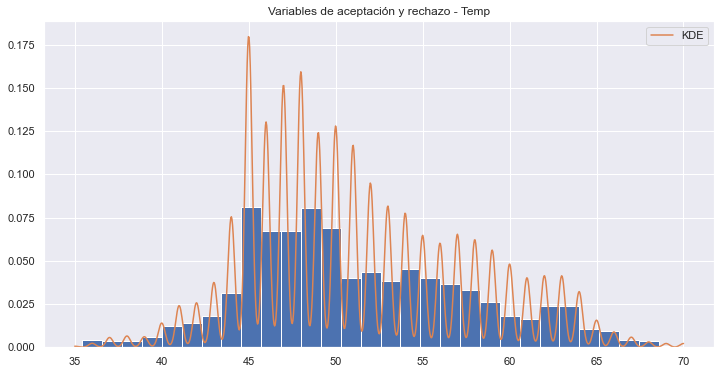

In [23]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(temp.reshape(-1, 1))
x_grid = np.linspace(35, 70, 1000)
pdf_temp = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias = red_var(temp,100000,pdf, lambda x: max(pdf_temp) * np.ones(len(x)), model) # usand pdf
plt.hist(var_aleatorias, 30, density=True)

plt.plot(x_grid, pdf_temp, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Temp')
plt.legend()
plt.show()

#### Distribuciones

,Error
Distribución,
fisk,0.000579159
fatiguelife,0.000580119
exponweib,0.000580335
gamma,0.000584014
beta,0.000585325
f,0.000606735
frechet_r,0.000636604
gausshyper,0.000642338
foldnorm,0.00065797


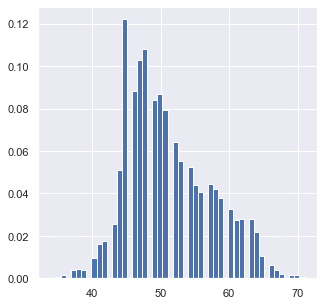

In [24]:
distribuciones(temp) # la mejor distribución fue fisk para el nodo temperatura 

#### Prueba Q_Q

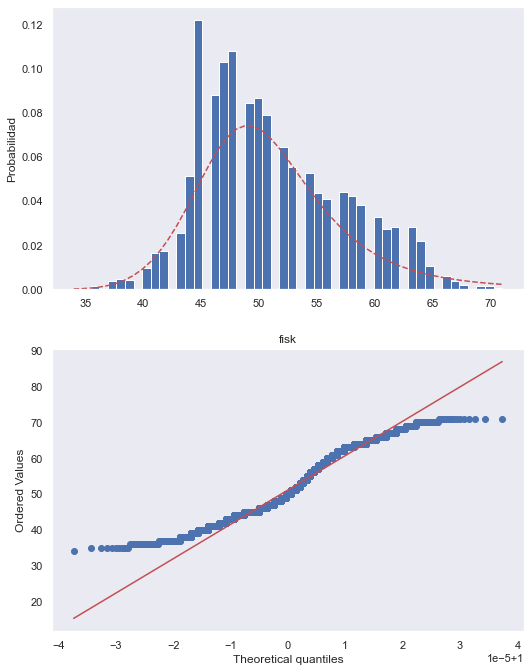

In [25]:
pruebaq_q(temp,'fisk') # llama la función para hacer la prueba de 45 grados 

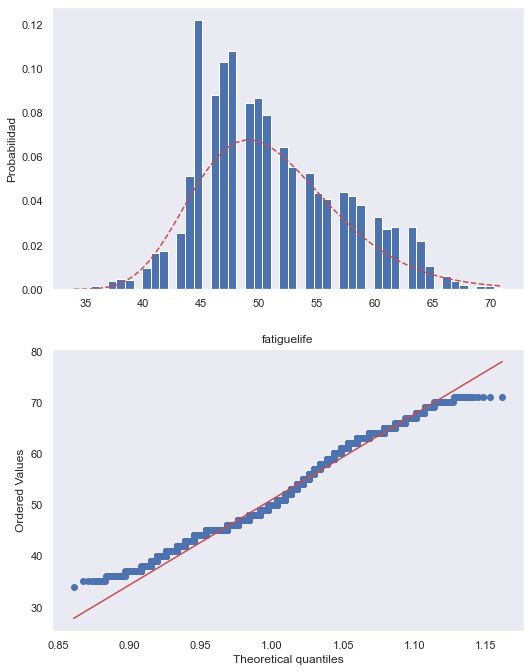

In [26]:
pruebaq_q(temp,'fatiguelife') # llama la función para hacer la prueba de 45 grados 

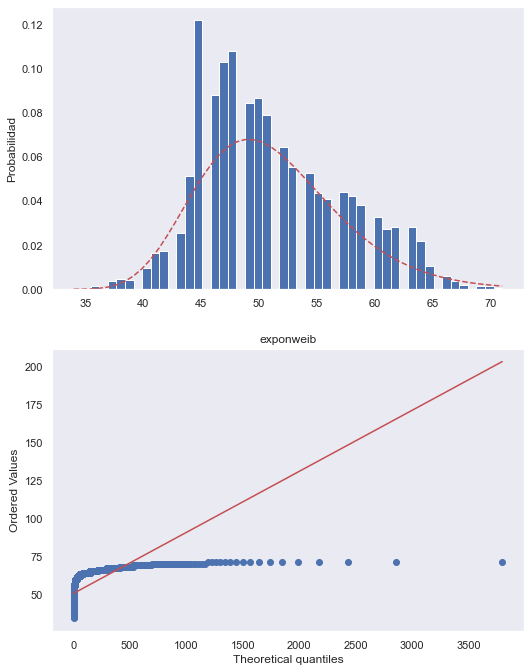

In [27]:
pruebaq_q(temp,'exponweib') # llama la función para hacer la prueba de 45 grados 

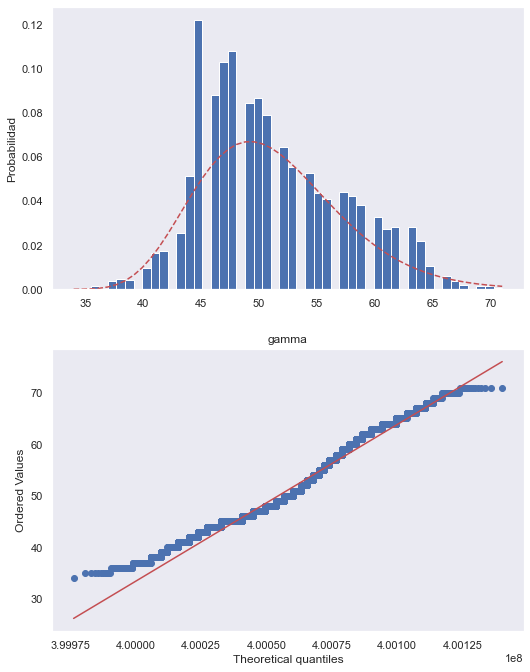

In [28]:
pruebaq_q(temp,'gamma') # llama la función para hacer la prueba de 45 grados 

#### Prueba Kolmogorov-Smirnov

In [29]:
kolmogorov(temp,'fisk') # hacemos prueba de kolmogrov 

KstestResult(statistic=0.07267499101612213, pvalue=1.427658237335528e-150)

In [30]:
kolmogorov(temp,'fatiguelife') # hacemos prueba de kolmogrov 

KstestResult(statistic=0.07422492837844252, pvalue=4.726000019039795e-157)

In [31]:
kolmogorov(temp,'gamma') # hacemos prueba de kolmogrov 

KstestResult(statistic=0.07572264732191525, pvalue=1.914851128060736e-163)

#### Prueba Chi Cuadrada

Chi cuadrado teórico:  39.57119394186237
Chi cuadrado stats:  Power_divergenceResult(statistic=39.57119394186237, pvalue=0.09119599749838148)
Estadístico de chi_cuadrado:  38.885138659830055
Media muestral =  53.11666666666666 
Desviación estándar muestral =  10.675044453025668


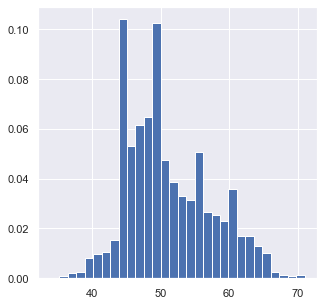

In [32]:
J1 = 30
y, x, _ = plt.hist(temp, bins = J1, density = True)
x = x[1:]
chi_cuadrada('fatiguelife',temp,x,y,J1,0.95) # aplicamos la prueba de chi cuadrada 

#### Montecarlo: Media

In [79]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(temp.reshape(-1, 1))
x_grid = np.linspace(35, 70, 10)
pdf_temp = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(temp,10000,pdf, lambda x: max(pdf_temp) * np.ones(len(x)), model).mean() for i in range(10)] # usand pdf

In [80]:
media_temp_montecarlo = np.mean(montecarlo)

#### Intervalo de confianza para la media

In [86]:
intervalo_confianza(temp,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (51.03602631133424, 51.17048412126687)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (51.036028800899565, 51.17048163170154)
Media calculada 51.10325521630055
La media es 51.10325521630055 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


## Nodo 2: Presión

#### Box-Plots y Ajuste de datos

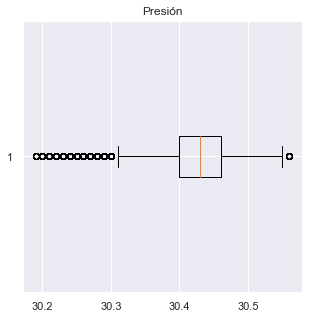

In [51]:
pres = np.array(data['Pressure'])
boxplot(pres,'Presión') # sacamos boxplot para ver la distribución de nuestros datos

In [52]:
# normalizamos datos con standars score ya que con logaritmo y sqrt no tuvimos los resultados que queríamos
pres_std = pres.std()
pres_mean = pres.mean()
pres = (pres-pres_mean)/pres_std
pres = pres[~np.isnan(pres)]
pres # aplicamos una transformación de raiz cuadrada para mejorar la distribución de nuestros datos

array([ 0.67897416,  0.67897416,  0.67897416, ..., -0.05265751,
       -0.05265751,  0.1302504 ])

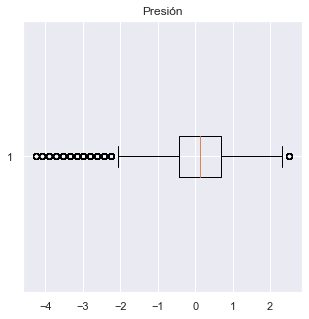

In [24]:
boxplot(pres,'Presión') # usamos showfliers para eliminar los outliers ya que la transformación no fue suficiente 

#### KDE

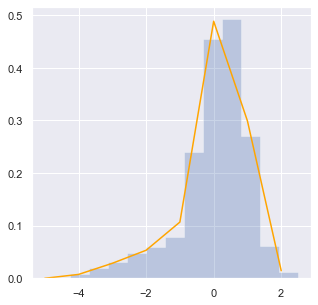

In [25]:
x_grid = np.arange(-5,3)
kde = kde_statsmodels_m(pres)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(pres, bins=12, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Reducción de Varianza

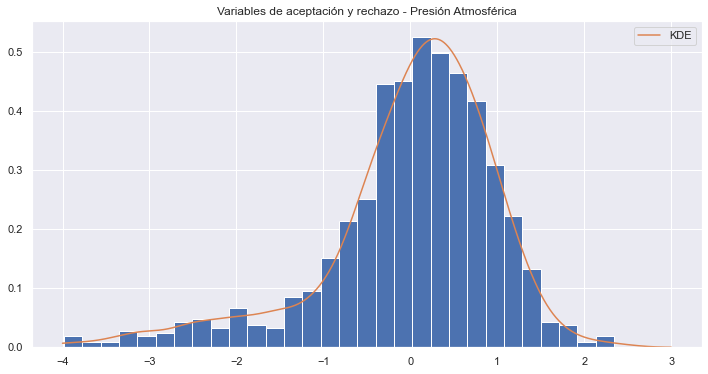

In [59]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(pres.reshape(-1, 1))
x_grid = np.linspace(-4, 3, 1000)
pdf_pres = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias = red_var(pres,100000,pdf, lambda x: max(pdf_pres) * np.ones(len(x)), model) # usand pdf

plt.hist(var_aleatorias, 30, density=True)

plt.plot(x_grid, pdf_pres, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Presión Atmosférica')
plt.legend()
plt.show()

#### Distribuciones

,Error
Distribución,
exponweib,0.0195129
foldcauchy,0.0207333
beta,0.0211432
fisk,0.0214189
frechet_l,0.0245244
foldnorm,0.0250134
fatiguelife,0.025115
gamma,0.0265658
gausshyper,0.0341759


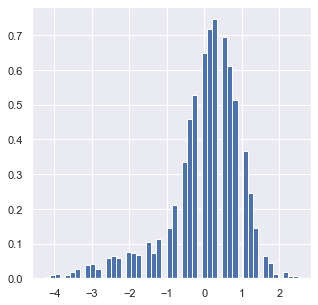

In [27]:
distribuciones(pres)

#### Prueba Q_Q

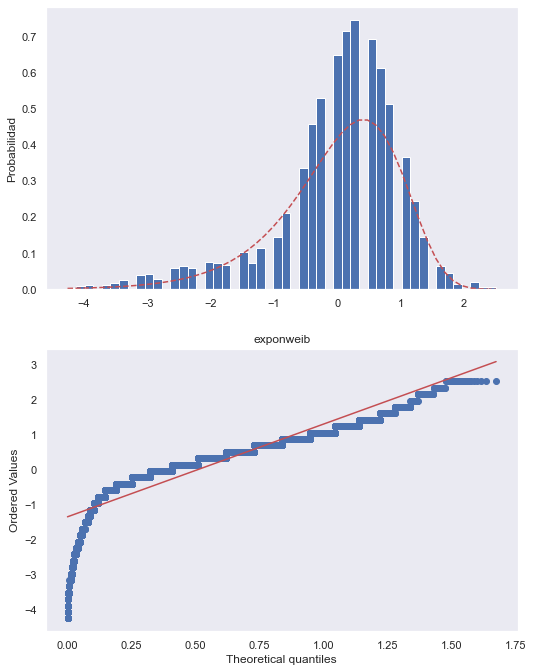

In [28]:
pruebaq_q(pres,'exponweib') # probamos las mejores distribuciones con la prueba q_q

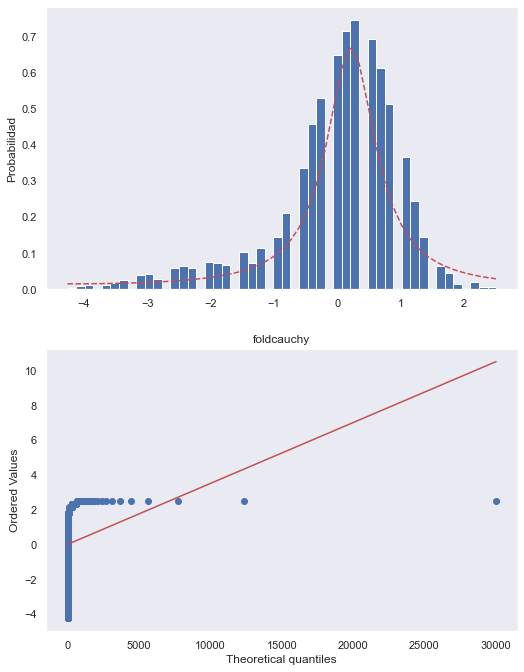

In [29]:
pruebaq_q(pres,'foldcauchy') # probamos las mejores distribuciones con la prueba q_q

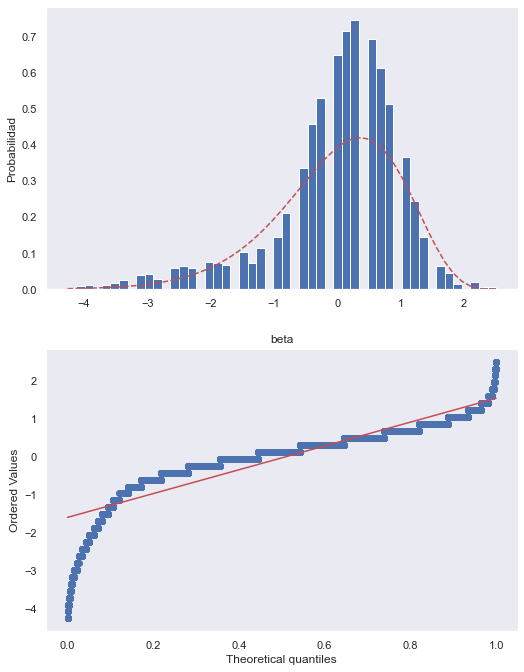

In [30]:
pruebaq_q(pres,'beta') # probamos las mejores distribuciones con la prueba q_q

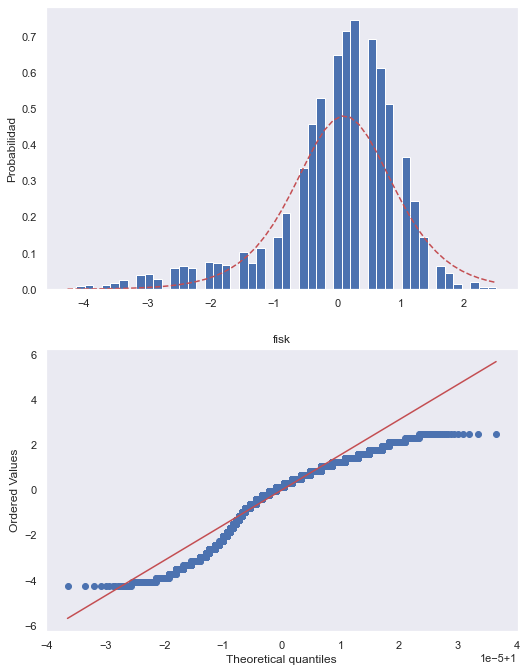

In [31]:
pruebaq_q(pres,'fisk') # probamos las mejores distribuciones con la prueba q_q

#### Prueba Kolmogorov-Smirnov

In [32]:
kolmogorov(pres,'exponweib') # prueba de kolmogrov 

KstestResult(statistic=0.06942032140862103, pvalue=2.065441850000042e-137)

In [33]:
kolmogorov(pres,'beta') # prueba de kolmogrov 

KstestResult(statistic=0.09418408139721213, pvalue=8.5682234774786e-253)

In [34]:
kolmogorov(pres,'f') # prueba de kolmogrov 

KstestResult(statistic=0.42895383062245357, pvalue=0.0)

#### Prueba Chi Cuadrada

Chi cuadrado teórico:  168.51560883773325
Chi cuadrado stats:  Power_divergenceResult(statistic=168.51560883773325, pvalue=1.3009883964439752e-21)
Estadístico de chi_cuadrado:  37.65248413348277
Media muestral =  -0.7629499299139515 
Desviación estándar muestral =  1.9525501576031037


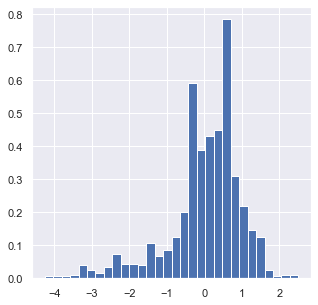

In [35]:
J1 = 30
y, x, _ = plt.hist(pres, bins = J1, density = True)
x = x[1:]
chi_cuadrada('f',pres,x,y,J1,0.95) # prueba de chicuadrada 

#### Montecarlo: Media

In [65]:
# quitamos el ajuste de nuestros datos para poder simular
pres = (pres*pres_std)+pres_mean

model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(pres.reshape(-1, 1))
x_grid = np.linspace(-4, 3, 10)
pdf_pres = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(pres,10000,pdf, lambda x: max(pdf_temp) * np.ones(len(x)), model).mean() for i in range(10)] # usand pdf

In [66]:
np.mean(montecarlo)

32.083632005316716

#### Intervalo de confianza para la media

In [88]:
intervalo_confianza(pres,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (32.08613583445258, 32.086200646376156)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (32.08613583565261, 32.08620064517612)
Media calculada 32.086168240414366
La media es 32.086168240414366 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


## Nodo 3: Humedad 

#### Box-Plots y Ajuste de datos

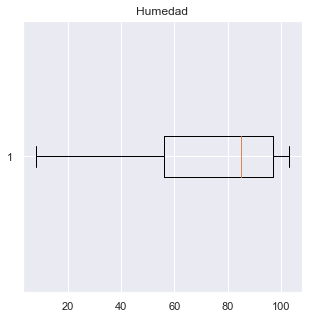

In [55]:
hume = np.array(data['Humidity'])
boxplot(hume,'Humedad') # mostramos boxplot de datos para ver si hay muchos outliers

#### KDE

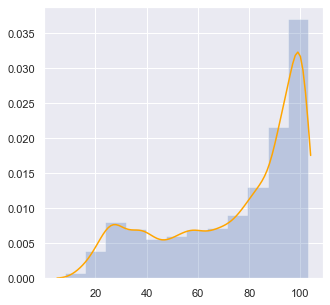

In [56]:
x_grid = np.arange(5,105)
kde = kde_statsmodels_m(hume)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(hume, bins=12, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Reducción de Varianza

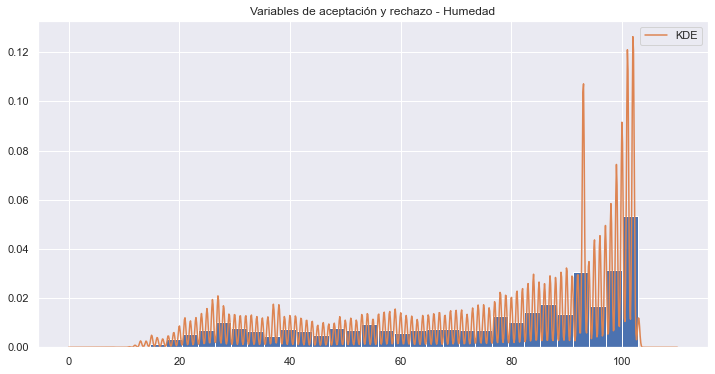

In [58]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(hume.reshape(-1, 1))
x_grid = np.linspace(0, 110, 1000)
pdf_hume = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias = red_var(hume,100000,pdf, lambda x: max(pdf_hume) * np.ones(len(x)), model) # usand pdf

plt.hist(var_aleatorias, 30, density=True)

plt.plot(x_grid, pdf_hume, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Humedad')
plt.legend()
plt.show()

#### Distribuciones

,Error
Distribución,
foldcauchy,8.38996e-05
exponweib,9.44032e-05
fisk,0.000108003
f,0.000111269
fatiguelife,0.000112453
gamma,0.00011442
foldnorm,0.000197029
frechet_r,0.000311335
gausshyper,5.85187e+09


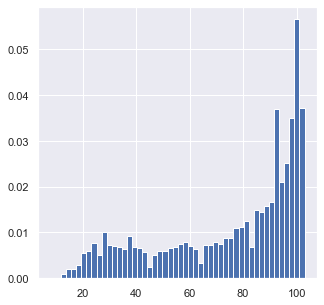

In [38]:
distribuciones(hume)

#### Prueba Q_Q

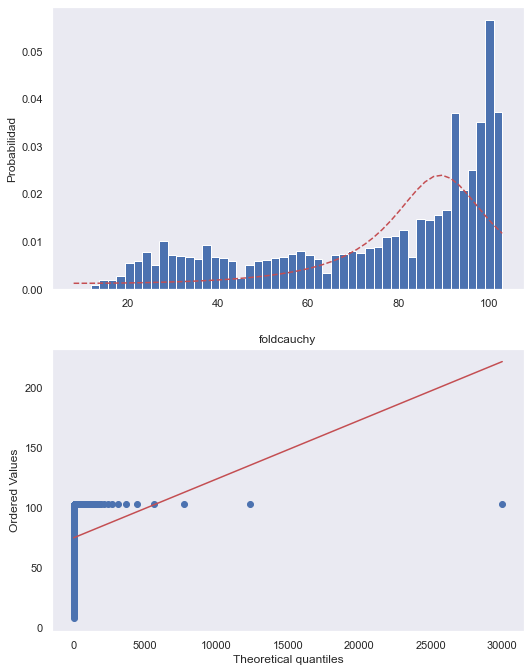

In [39]:
pruebaq_q(hume,'foldcauchy')

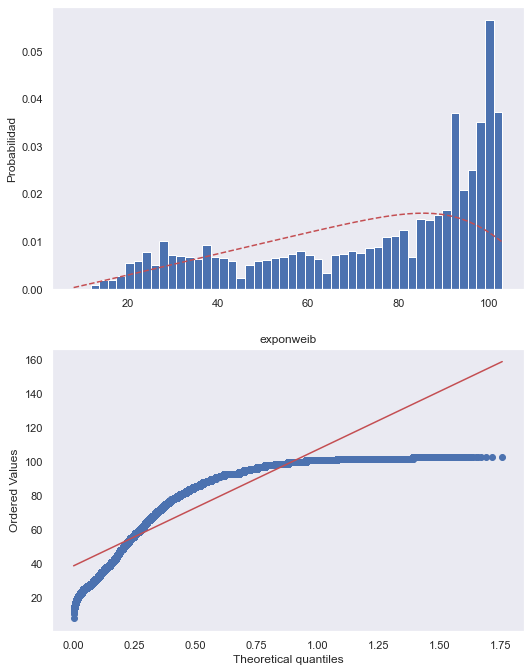

In [40]:
pruebaq_q(hume,'exponweib')

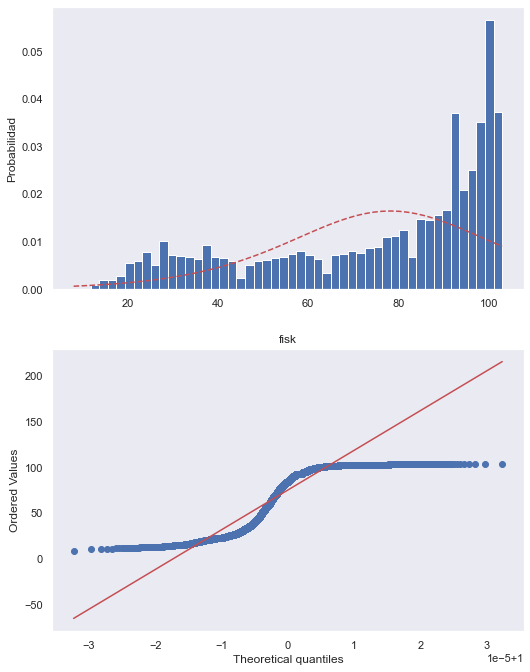

In [41]:
pruebaq_q(hume,'fisk')

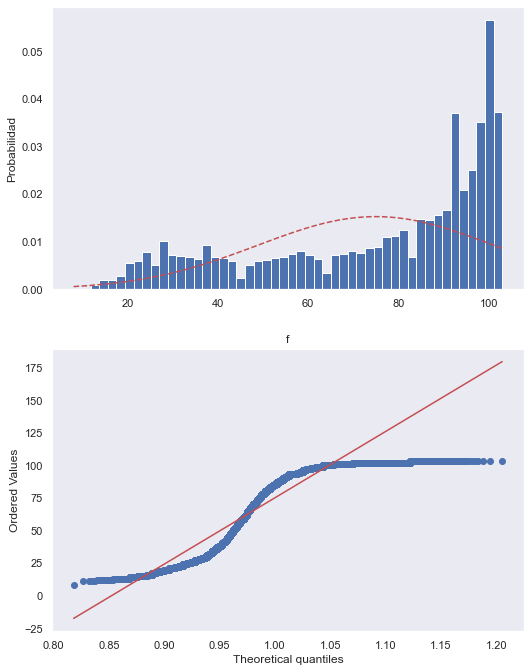

In [42]:
pruebaq_q(hume,'f')

#### Prueba Kolmogorov-Smirnov

In [43]:
kolmogorov(hume,'exponweib') # prueba de kolmogrov 

KstestResult(statistic=0.18979415242849074, pvalue=0.0)

In [44]:
kolmogorov(hume,'fisk') # prueba de kolmogrov 

KstestResult(statistic=0.16688009812313076, pvalue=0.0)

In [45]:
kolmogorov(hume,'f') # prueba de kolmogrov 

KstestResult(statistic=0.15486908188528026, pvalue=0.0)

#### Prueba Chi Cuadradra

Chi cuadrado teórico:  18.275174049293877
Chi cuadrado stats:  Power_divergenceResult(statistic=18.275174049293877, pvalue=0.9384710557836308)
Estadístico de chi_cuadrado:  37.65248413348277
Media muestral =  57.083333333333336 
Desviación estándar muestral =  27.408897919930766


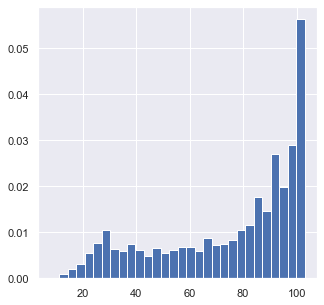

In [46]:
J1 = 30
y, x, _ = plt.hist(hume, bins = J1, density = True)
x = x[1:]
chi_cuadrada('f',hume,x,y,J1,0.95) # prueba de chicuadrada 

#### Montecarlo: Media

In [75]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(hume.reshape(-1, 1))
x_grid = np.linspace(0, 110, 10)
pdf_hume = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(hume,10000,pdf, lambda x: max(pdf_hume) * np.ones(len(x)), model).mean() for i in range(10)] # usand pdf

In [76]:
np.mean(montecarlo)

71.05048803702678

#### Intervalo de confianza para la media

In [89]:
intervalo_confianza(hume,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (74.73453767196068, 75.29807567932122)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (74.73454810619785, 75.29806524508405)
Media calculada 75.01630667564095
La media es 75.01630667564095 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


## Nodo 4: Velocidad

#### Box-plots y Ajuste de Datos

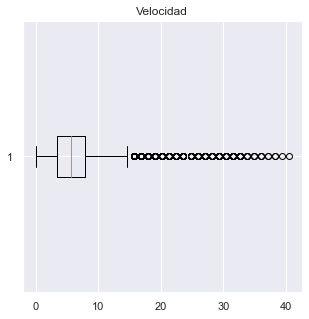

In [62]:
velo = np.array(data['Speed'])
boxplot(velo,'Velocidad')

#### KDE

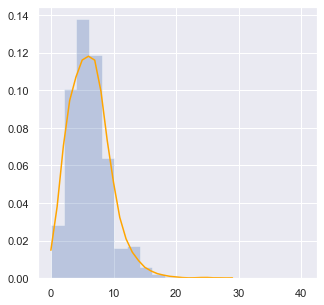

In [63]:
x_grid = np.arange(0,30)
kde = kde_statsmodels_m(velo)
plt.plot(x_grid, kde(x_grid),c='orange')
plt.hist(velo, bins=20, fc='b', histtype='stepfilled', alpha=0.3, density=True)
plt.show()

#### Reducción de Varianza

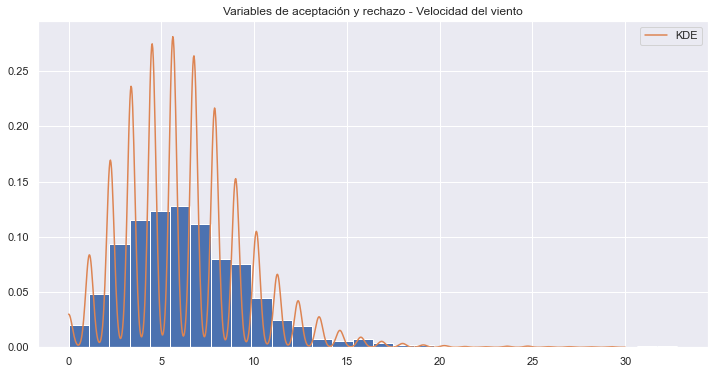

In [64]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(velo.reshape(-1, 1))
x_grid = np.linspace(0, 30, 1000)
pdf_velo = pdf(x_grid[:, None], model) # usando función pdf

plt.figure(figsize=(12,6))
var_aleatorias = red_var(velo,100000,pdf, lambda x: max(pdf_velo) * np.ones(len(x)), model) # usand pdf

plt.hist(var_aleatorias, 30, density=True)

plt.plot(x_grid, pdf_velo, alpha=1, label='KDE') # graficamos
plt.title('Variables de aceptación y rechazo - Velocidad del viento')
plt.legend()
plt.show()

#### Distribuciones

,Error
Distribución,
fisk,0.000872727
fatiguelife,0.000887489
beta,0.000888494
gamma,0.000889451
frechet_r,0.000920204
foldnorm,0.000942371
gausshyper,0.00179657
foldcauchy,0.00212359
f,0.00284497


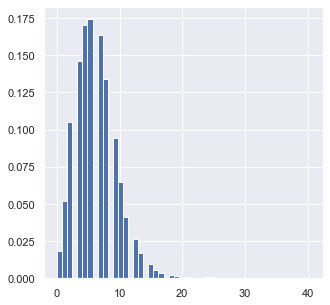

In [49]:
distribuciones(velo)

#### Prueba Q_Q

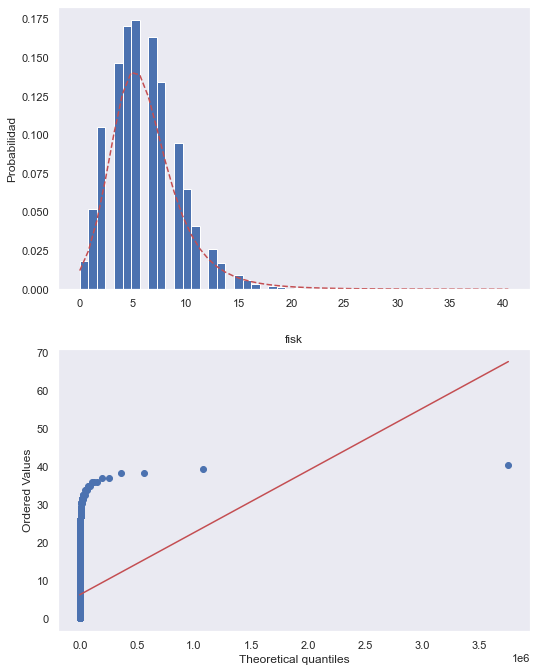

In [50]:
pruebaq_q(velo,'fisk')

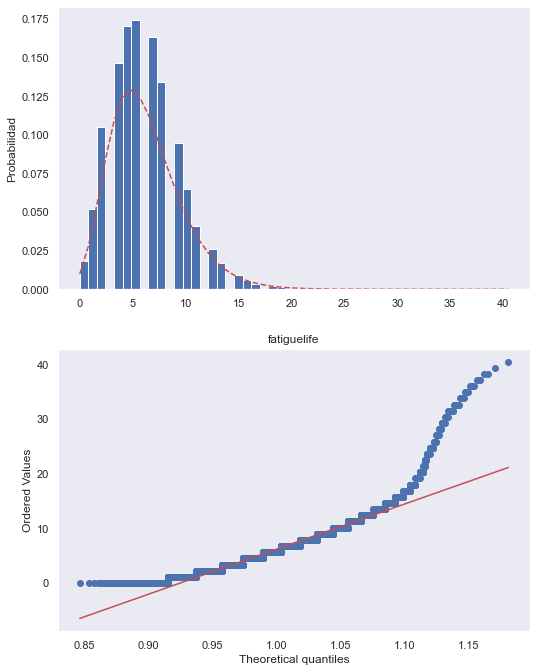

In [51]:
pruebaq_q(velo,'fatiguelife')

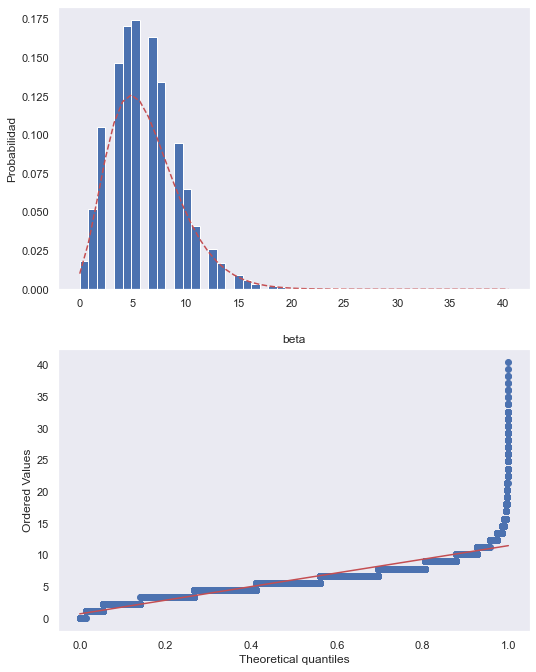

In [52]:
pruebaq_q(velo,'beta')

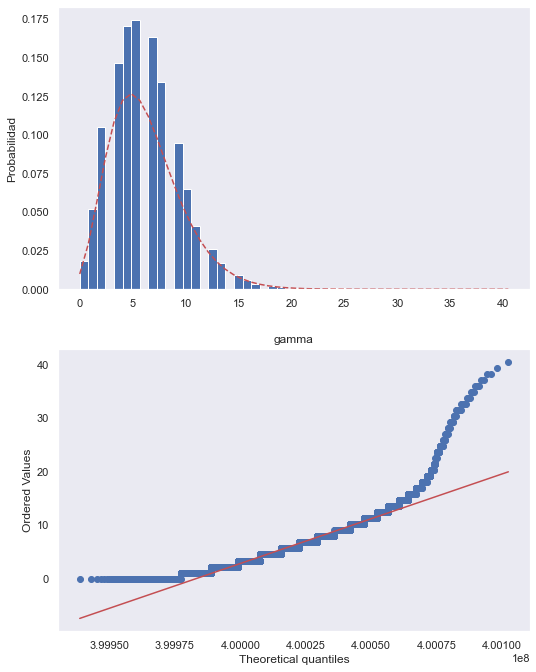

In [53]:
pruebaq_q(velo,'gamma')

#### Prueba Kolmogorov-Smirnov

In [54]:
kolmogorov(velo,'fatiguelife') # prueba de kolmogrov 

KstestResult(statistic=0.08384299469403761, pvalue=2.4462908852503942e-200)

In [55]:
kolmogorov(velo,'beta') # prueba de kolmogrov 

KstestResult(statistic=0.08116566802952946, pvalue=9.329704642733676e-188)

In [56]:
kolmogorov(velo,'gamma') # prueba de kolmogrov 

KstestResult(statistic=0.08271439012502163, pvalue=5.522727441454002e-195)

#### Prueba Chi Cuadrada

Chi cuadrado teórico:  -74102295097057.2
Chi cuadrado stats:  Power_divergenceResult(statistic=-74102295097057.2, pvalue=1.0)
Estadístico de chi_cuadrado:  38.885138659830055
Media muestral =  -0.7629499299139515 
Desviación estándar muestral =  1.9525501576031037


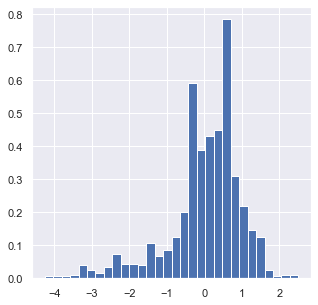

In [57]:
J1 = 30
y, x, _ = plt.hist(pres, bins = J1, density = True)
x = x[1:]
chi_cuadrada('fatiguelife',velo,x,y,J1,0.95) # prueba de chicuadrada 

#### Montecarlo: Media

In [90]:
model = KernelDensity(bandwidth=0.2) #usando bandwidth óptimo
model.fit(velo.reshape(-1, 1))
x_grid = np.linspace(0, 30, 10)
pdf_velo = pdf(x_grid[:, None], model) # usando función pdf

montecarlo = [red_var(velo,100000,pdf, lambda x: max(pdf_velo) * np.ones(len(x)), model).mean() for i in range(10)] # usand pdf

In [91]:
np.mean(montecarlo)

6.365111699736162

#### Intervalo de confianza para la media

In [92]:
intervalo_confianza(velo,0.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (6.206027802180984, 6.2817106791259985)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (6.2060292034939, 6.281709277813082)
Media calculada 6.243869240653491
La media es 6.243869240653491 con un 0.95 % de confianza, por lo tanto se acepta la hipótesis nula.


### Visualización de resultados de simulación

### Conclusiones

### Referencias

T.T.B. (2021, 4 agosto). Medical Insurance Premium Prediction. Recuperado 9 de octubre de 2021, de https://www.kaggle.com/tejashvi14/medical-insurance-premium-prediction